In [1]:
import glob, os 
from skimage import io, transform

import numpy as np


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, initializers, optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

## Import data

### Get training data

In [2]:
path = "images/Training"
imlist = glob.glob(os.path.join(path, '*.jpg'))

In [3]:
def dataset(file_list,size=(224,224),flattened=False):
	data = []
	for i, file in enumerate(file_list):
		image = io.imread(file)
		image = transform.resize(image, size, mode='constant')
		if flattened:
			image = image.flatten()

		data.append(image)
		if i % 100 == 0:
			print('processed %d images' % i)
	for f in file_list:
		print(f)
		break
	labels = [f.split('\\')[-1].split('_')[0] for f in file_list]
	
	return np.array(data), labels

In [4]:
# Load the dataset (may take a few seconds)
X,y=dataset(imlist)

processed 0 images
processed 100 images
processed 200 images
processed 300 images
processed 400 images
processed 500 images
processed 600 images
processed 700 images
processed 800 images
processed 900 images
processed 1000 images
processed 1100 images
processed 1200 images
processed 1300 images
processed 1400 images
processed 1500 images
processed 1600 images
processed 1700 images
processed 1800 images
processed 1900 images
processed 2000 images
processed 2100 images
processed 2200 images
processed 2300 images
processed 2400 images
processed 2500 images
processed 2600 images
processed 2700 images
processed 2800 images
processed 2900 images
processed 3000 images
processed 3100 images
processed 3200 images
processed 3300 images
processed 3400 images
processed 3500 images
processed 3600 images
processed 3700 images
processed 3800 images
processed 3900 images
processed 4000 images
processed 4100 images
images/Training\Banh beo_1.jpg


In [5]:
# X has the following structure: X[imageid, y,x,channel]
print('X: ',X.shape)  # data
print('y: ',y)  # target

X:  (4173, 224, 224, 3)
y:  ['Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo',

In [6]:

print('Total  : ',len(y))
print(y)

Total  :  4173
['Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 

In [7]:
X_train, y_train = X, y

### Get val data

In [8]:
path = "images/Val"
imlist = glob.glob(os.path.join(path, '*.jpg'))

In [9]:
# Load the dataset (may take a few seconds)
X_val, y_val=dataset(imlist)

processed 0 images
processed 100 images
processed 200 images
processed 300 images
processed 400 images
images/Val\Banh beo_10.jpg


In [10]:
# X has the following structure: X[imageid, y,x,channel]
print('X: ',X_val.shape)  # data
print('y: ',y_val)  # target

X:  (500, 224, 224, 3)
y:  ['Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh ch

In [11]:
print('Total  : ',len(y_val))
print(y_val)

Total  :  500
['Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh chung', 'Banh c

### Get test data

In [12]:
path = "images/Test"
imlist = glob.glob(os.path.join(path, '*.jpg'))

In [13]:
# Load the dataset (may take a few seconds)
X_test,y_test=dataset(imlist)

processed 0 images
processed 100 images
processed 200 images
processed 300 images
processed 400 images
processed 500 images
processed 600 images
processed 700 images
processed 800 images
processed 900 images
images/Test\Banh beo_10.jpg


In [14]:
# X has the following structure: X[imageid, y,x,channel]
print('X: ',X_test.shape)  # data
print('y: ',y_test)  # target

X:  (1000, 224, 224, 3)
y:  ['Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo',

In [15]:
print('Total  : ',len(y_test))
print(y_test)

Total  :  1000
['Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 'Banh beo', 

In [16]:
print(np.unique(y_test))
print(np.unique(y_val))
print(np.unique(y_train)) 

['Banh beo' 'Banh chung' 'Banh cuon' 'Banh mi' 'Banh trang nuong'
 'Banh xeo' 'Bun dau mam tom' 'Ca kho to' 'Pho' 'Xoi xeo']
['Banh beo' 'Banh chung' 'Banh cuon' 'Banh mi' 'Banh trang nuong'
 'Banh xeo' 'Bun dau mam tom' 'Ca kho to' 'Pho' 'Xoi xeo']
['Banh beo' 'Banh chung' 'Banh cuon' 'Banh mi' 'Banh trang nuong'
 'Banh xeo' 'Bun dau mam tom' 'Ca kho to' 'Pho' 'Xoi xeo']


### Encode labels

In [17]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder_temp = ['Banh beo', 'Banh chung', 'Banh cuon', 'Banh mi', 'Banh trang nuong', 'Banh xeo', 'Bun dau mam tom', 'Ca kho to', 'Pho', 'Xoi xeo']
label_encoder_temp_encoded = label_encoder.fit_transform(label_encoder_temp)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)
print("Nhãn đã mã hóa:", y_test_encoded)
for idx, label in enumerate(label_encoder.classes_):
    print(f"{idx}: {label}")

Nhãn đã mã hóa: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 

In [18]:
for idx, label in enumerate(label_encoder.classes_):
    print(f"{idx}: {label}")

0: Banh beo
1: Banh chung
2: Banh cuon
3: Banh mi
4: Banh trang nuong
5: Banh xeo
6: Bun dau mam tom
7: Ca kho to
8: Pho
9: Xoi xeo


## Model

### CNN

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

input_shape = (224, 224, 3)
num_classes = len(set(y_train_encoded))

model = Sequential([
    Conv2D(256, (3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Thêm ReduceLROnPlateau để giảm learning rate nếu mô hình không cải thiện
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)
history = model.fit(
    X_train, y_train_encoded,
    validation_data=(X_val, y_val_encoded),
    epochs=200,
    batch_size=12,
    callbacks=[reduce_lr, early_stopping]
)

test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 256)     7168      
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 256)    1024      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     295040    
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 128)    512       
 hNormalization)                                                 
                                                        

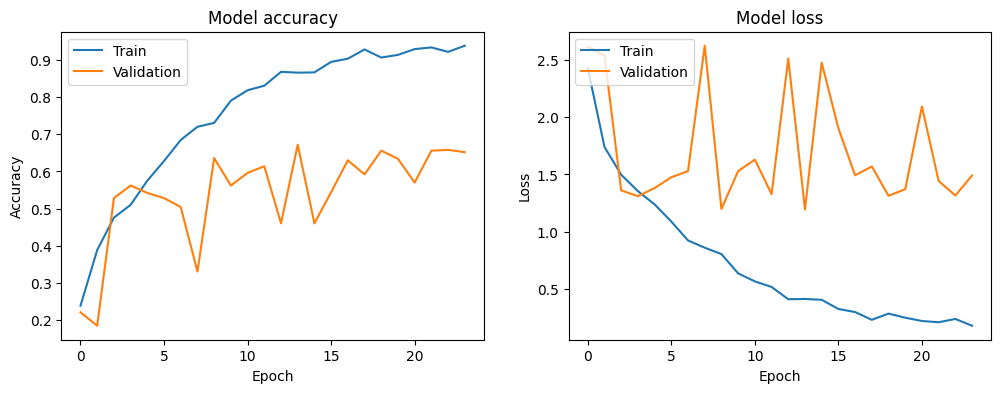

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [21]:
model.save('model1.h5')

### Resnet50

#### Version 1



In [22]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Xây dựng mô hình với ResNet50
model_02 = Sequential()
model_02.add(ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
model_02.add(GlobalAveragePooling2D())
model_02.add(Dense(256, activation='relu'))
model_02.add(Dropout(0.4))
model_02.add(Dense(128, activation='relu'))
model_02.add(Dropout(0.4))
model_02.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Biên dịch mô hình
model_02.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Thêm ReduceLROnPlateau để giảm learning rate nếu mô hình không cải thiện
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

# Huấn luyện mô hình
epochs = 100
batch_size = 20
history = model_02.fit(
    X_train, 
    y_train_encoded, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(X_val, y_val_encoded), 
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/100
209/209 [==============================] - 42s 176ms/step - loss: 1.4677 - accuracy: 0.5600 - val_loss: 3.0178 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/100
209/209 [==============================] - 35s 166ms/step - loss: 0.8858 - accuracy: 0.7443 - val_loss: 2.5937 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 3/100
209/209 [==============================] - 34s 165ms/step - loss: 0.6327 - accuracy: 0.8169 - val_loss: 4.7675 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 4/100
209/209 [==============================] - 34s 165ms/step - loss: 0.4428 - accuracy: 0.8761 - val_loss: 2.9570 - val_accuracy: 0.2340 - lr: 0.0010
Epoch 5/100
209/209 [==============================] - 35s 166ms/step - loss: 0.3410 - accuracy: 0.8998 - val_loss: 1.1312 - val_accuracy: 0.6660 - lr: 0.0010
Epoch 6/100
209/209 [==============================] - 35s 165ms/step - loss: 0.2790 - accuracy: 0.9255 - val_loss: 0.6565 - val_accuracy: 0.8300 - lr: 0.0010
Epoch 7/100
209/209 [=========================

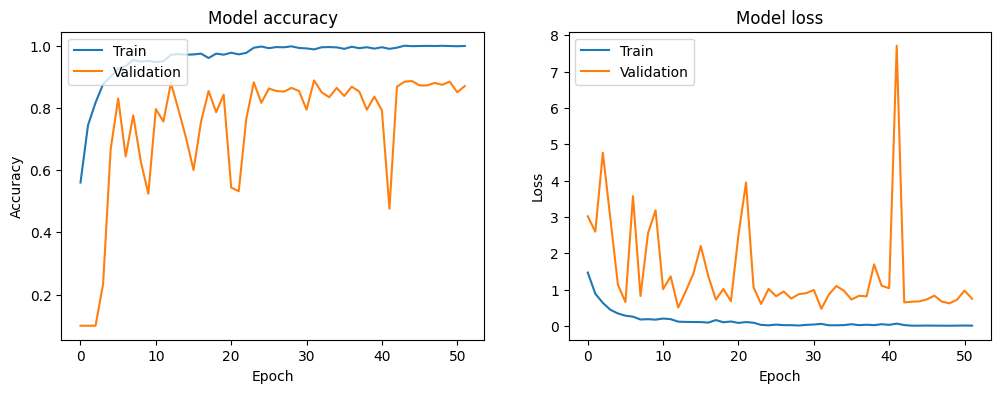

In [23]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [24]:

test_loss, test_accuracy = model_02.evaluate(X_test, y_test_encoded)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

32/32 [==============================] - 3s 63ms/step - loss: 0.4477 - accuracy: 0.8980
Test loss: 0.44774776697158813, Test accuracy: 0.8980000019073486


In [25]:
model_02.save('Resnet50_100_20_0,4.h5')

#### Version 2



In [27]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Xây dựng mô hình với ResNet50
model_03 = Sequential()
model_03.add(ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)))
model_03.add(GlobalAveragePooling2D())
model_03.add(Dense(256, activation='relu'))
model_03.add(Dropout(0.4))
model_03.add(Dense(128, activation='relu'))
model_03.add(Dropout(0.4))
model_03.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Biên dịch mô hình
model_03.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Thêm ReduceLROnPlateau để giảm learning rate nếu mô hình không cải thiện
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

# Huấn luyện mô hình
epochs = 100
batch_size = 16
history = model_03.fit(
    X_train, 
    y_train_encoded, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(X_val, y_val_encoded), 
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/100
261/261 [==============================] - 45s 149ms/step - loss: 1.8880 - accuracy: 0.3959 - val_loss: 4.0762 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 2/100
261/261 [==============================] - 35s 135ms/step - loss: 1.1222 - accuracy: 0.6612 - val_loss: 2.6101 - val_accuracy: 0.1340 - lr: 0.0010
Epoch 3/100
261/261 [==============================] - 35s 135ms/step - loss: 0.8159 - accuracy: 0.7496 - val_loss: 2.3202 - val_accuracy: 0.1660 - lr: 0.0010
Epoch 4/100
261/261 [==============================] - 35s 135ms/step - loss: 0.6370 - accuracy: 0.8119 - val_loss: 1.9715 - val_accuracy: 0.3380 - lr: 0.0010
Epoch 5/100
261/261 [==============================] - 35s 135ms/step - loss: 0.5098 - accuracy: 0.8533 - val_loss: 1.1609 - val_accuracy: 0.6820 - lr: 0.0010
Epoch 6/100
261/261 [==============================] - 35s 134ms/step - loss: 0.3951 - accuracy: 0.8871 - val_loss: 3.1036 - val_accuracy: 0.4720 - lr: 0.0010
Epoch 7/100
261/261 [=========================

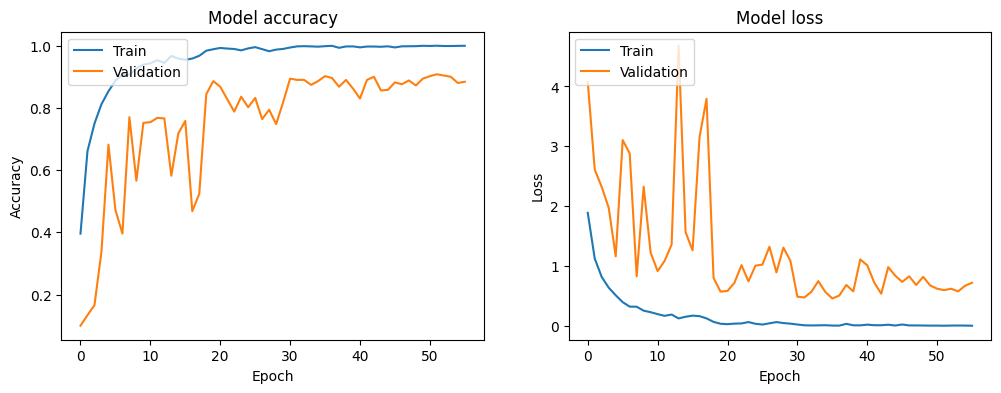

In [28]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [29]:

test_loss, test_accuracy = model_03.evaluate(X_test, y_test_encoded)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

32/32 [==============================] - 2s 63ms/step - loss: 0.5146 - accuracy: 0.9010
Test loss: 0.5146339535713196, Test accuracy: 0.9010000228881836


In [ ]:
model_03.save('Resnet50_100_16_0,4.h5')

## Testing unseen data (not in dataset)

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
model = tf.keras.models.load_model('Resnet50_100_16_0,4.h5')

In [ ]:
def testing_data(file_list,size=(224,224), flattened=False):
	data = []
	for i, file in enumerate(file_list):
		image = io.imread(file)
		image = transform.resize(image, size, mode='constant')
		if flattened:
			image = image.flatten()

		data.append(image)
		
		print(f'processed {i+1} images')
	
	return np.array(data)

In [ ]:
path = "unseen"
imlist = glob.glob(os.path.join(path, '*.jpg'))

In [ ]:
unseen =  testing_data(imlist)

processed 1 images
processed 2 images


In [ ]:
predictions = model.predict(unseen)
predicted_labels = np.argmax(predictions, axis=1)
for label in predicted_labels:
    print(label_encoder.classes_[label])

1/1 [==============================] - 0s 18ms/step
Banh xeo
Banh xeo


### Code to import(load) model

In [ ]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
model = tf.keras.models.load_model('Resnet50_100_16_0,4.h5')